In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
"plot dendrogram function from scikit-learn's example"
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [41]:
data = pd.read_csv('../data/sustainability_data.csv')

In [42]:
##Standardize the Data in order to compute covariance
standardizedData = StandardScaler().fit_transform(data)
standardizedData

array([[ 0.44674462, -0.11757649,  0.71953232, ...,  0.46134197,
        -0.62082387, -2.111298  ],
       [ 0.70144727, -0.11757649,  0.38143511, ...,  0.47793409,
        -0.62075603, -0.30324148],
       [ 0.70144727, -0.11757649, -0.27722711, ...,  0.49404336,
        -0.62076126, -0.31756109],
       ...,
       [-1.14092175, -0.1607175 , -1.5855546 , ...,  1.0943443 ,
        -0.194618  , -0.85117168],
       [-1.1266267 ,  1.57978726, -1.71567153, ...,  1.09693408,
        -0.15926946, -0.85347374],
       [-1.11220886,  3.59113382, -0.61474692, ...,  1.09816312,
        -0.20508349, -0.85456625]])

In [43]:
##Compute Covariance Matrix
df_cov_matrix = np.cov(standardizedData.T)
df_cov_matrix

array([[ 1.00030432e+00, -9.57901932e-03,  2.62281664e-01, ...,
        -5.88149982e-01, -2.04068672e-01,  5.34293624e-01],
       [-9.57901932e-03,  1.00030432e+00,  5.61347442e-02, ...,
         6.18229311e-03,  3.91071245e-02, -7.90466977e-03],
       [ 2.62281664e-01,  5.61347442e-02,  1.00030432e+00, ...,
        -1.76885739e-01, -1.08725588e-01,  1.74723151e-01],
       ...,
       [-5.88149982e-01,  6.18229311e-03, -1.76885739e-01, ...,
         1.00030432e+00,  8.18769297e-04, -8.36421719e-01],
       [-2.04068672e-01,  3.91071245e-02, -1.08725588e-01, ...,
         8.18769297e-04,  1.00030432e+00,  7.47852302e-02],
       [ 5.34293624e-01, -7.90466977e-03,  1.74723151e-01, ...,
        -8.36421719e-01,  7.47852302e-02,  1.00030432e+00]])

In [44]:
#Find EigenVectors and EigenValues
eig_vals, eig_vecs = np.linalg.eig(df_cov_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

print(eig_vecs.shape)

Eigenvectors 
[[-2.56118869e-01  7.18261635e-02  5.85804253e-02 ...  1.36651018e-01
   6.98026677e-06 -5.29200929e-12]
 [ 8.53646043e-04 -2.61770619e-03 -6.28237793e-03 ...  1.89474134e-03
  -2.62503183e-07  1.33063597e-12]
 [-9.39448176e-02  5.95657075e-02  1.76965977e-02 ... -1.79611264e-01
  -1.22939496e-05 -1.17827482e-12]
 ...
 [ 2.30452321e-01 -1.26718171e-01  2.17086931e-02 ... -1.65983021e-01
   3.11732460e-06  2.63874019e-11]
 [ 8.90856222e-02  2.13934343e-01 -4.85125998e-02 ... -4.17073267e-02
  -6.86335161e-06 -4.32215280e-12]
 [-2.23546298e-01  1.12193160e-01 -2.37891684e-02 ...  1.00059537e-01
   3.24873152e-05  1.30312624e-11]]

Eigenvalues 
[ 1.01543528e+01  3.43350905e+00  3.26187085e+00  2.73851839e+00
  2.48347510e+00  2.21791173e+00  1.98161001e+00  1.61975794e+00
  1.45597837e+00  1.40987785e+00  1.33631199e+00  1.27454657e+00
  1.16487280e+00  1.03227012e+00  9.71363157e-01  9.52380193e-01
  8.94993748e-01  8.20526286e-01  7.61586519e-01  6.92567258e-01
  6.7945860

In [45]:
# Selecting the number of principal components
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print("Cumulative variance captured as we travel with each component \n",cum_var_exp)

Variance captured by each component is 
 [20.71686433551192, 7.005029537992689, 6.654854077174702, 5.587112754844672, 5.066774599873049, 4.524973427682273, 4.042871723435057, 3.3046227759392797, 2.9704804434589454, 2.8764263748253756, 2.7263376341957057, 2.600324113256475, 2.376568195528367, 2.1060327945753623, 1.9817706944037525, 1.943041737973522, 1.8259621739224698, 1.6740339962856299, 1.553785351950714, 1.4129725694271866, 1.3862283503262895, 1.3326153914984686, 1.2517745038866406, 1.1296054945672687, 1.0889602910420753, 1.0069027290512214, 0.9764772620066213, 0.9022874295872138, 0.8512879056895918, 0.7844435527137251, 0.7079694597528112, 0.6671242132611721, 0.632790131583131, 0.5679721416834352, 0.53511438632207, 0.519429589618527, 0.47273955061275486, 0.42370097951535235, 0.34622129809675223, 0.32859024849941226, 0.2932693461437265, 0.2760000580388772, 0.1613173123997846, 0.14509625656570624, 0.12909792887648516, 0.08517433559779863, 0.04697047603154819, 6.477443045298425e-08, -2

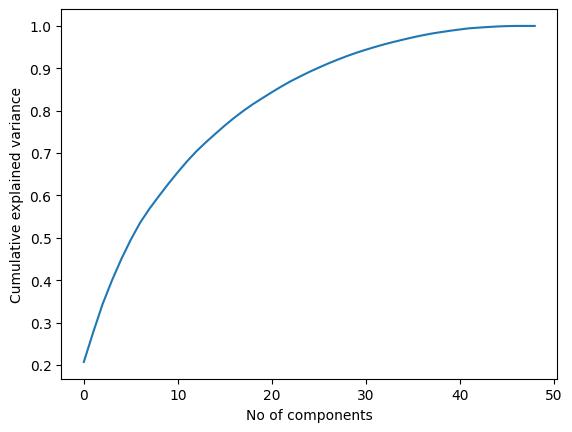

In [46]:
#Visualization of above graph
pca = PCA().fit(standardizedData)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [47]:

data = pd.read_csv("../data/sustainability_data.csv")

def get_reduce_data_csv(dim=40, standardize=True):
    np_data = np.array(data) # each row is a data point with 49 features 
    e_vectors = eig_vecs[:dim,:].T  # each column is an eigen vector 
    reduced_data = np.matmul(np_data, e_vectors)
    column_names = [f"PCA {i + 1}" for i in range(dim)]
    if standardize:                                                        # <----- standardizing the data  
        scaler = StandardScaler()                                          # <----- seems to make it mostly
        reduced_data = scaler.fit_transform(reduced_data)                  # <----- all the same value
    reduced_data_df = pd.DataFrame(data=reduced_data, columns=column_names)
    reduced_data_df.to_csv("../data/reduced_sustainability_data.csv", index=False)

get_reduce_data_csv(dim=40, standardize=False)


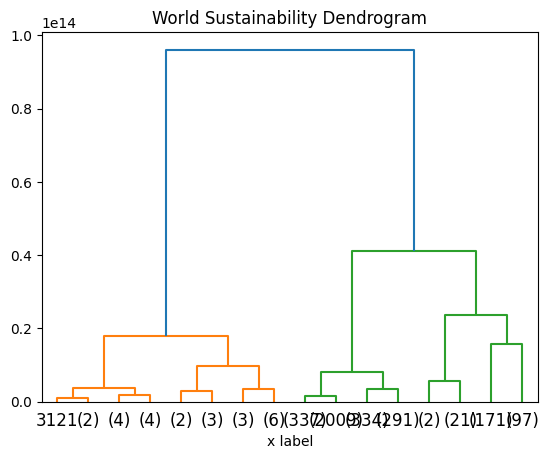

In [48]:
n = 5
data = pd.read_csv("../data/reduced_sustainability_data.csv")
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
"set linkage = Ward, Maximum or complete linkage, Average linkage, Single linkage"
model.fit(data)
plt.title("World Sustainability Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("x label")
plt.show()